<a href="https://colab.research.google.com/github/victorezealuma/Stock_Portfolio_Optimization/blob/main/Portfolio_Opt_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Description: The goal of this project is to optimize a porfolio using Efficient Frontier


In [ ]:
# Geting some information from yahoo finance
!pip install yfinance

In [32]:
# Importing python Libraries
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('_classic_test_patch')

In [33]:
import matplotlib.pyplot as plt

# Available styles
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [34]:
# Exploring objects in yf

dir(yf)

['Ticker',
 'Tickers',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'base',
 'const',
 'data',
 'download',
 'enable_debug_mode',
 'exceptions',
 'multi',
 'pdr_override',
 'scrapers',
 'set_tz_cache_location',
 'shared',
 'ticker',
 'tickers',
 'utils',
 'version']

In [35]:
tickers = ("BA,CMT,CMCSA,CRM,CVX")

# Start date and end date of the stocks
startDate = '2019-01-01'



In [36]:
# Getting required data from yahoo finance
df = yf.download(tickers, period= '5y')['Adj Close']
df

[*********************100%%**********************]  5 of 5 completed


,BA,CMCSA,CMT,CRM,CVX
Date,,,,,
2018-11-05,350.118073,33.873627,7.18,135.440002,95.523041
2018-11-06,354.460938,33.615250,7.21,133.949997,95.490921
2018-11-07,359.829041,34.123074,7.16,141.789993,97.073059
2018-11-08,360.276001,34.123074,7.08,141.869995,95.860352
2018-11-09,358.886475,34.158722,7.21,136.919998,95.980820
...,...,...,...,...,...
2023-10-27,179.690002,39.639999,25.76,196.570007,144.350006
2023-10-30,182.350006,40.450001,25.84,199.270004,146.089996
2023-10-31,186.820007,41.290001,25.58,200.830002,145.729996


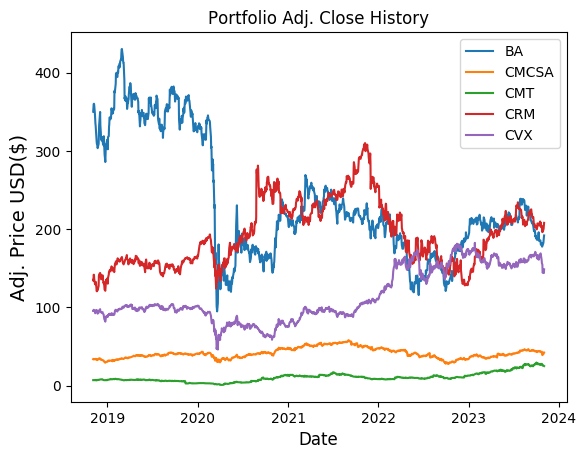

In [40]:
# Visual for the stock/Portfolio

title = 'Portfolio Adj. Close History'

stocks = df

for c in stocks.columns.values:
  plt.plot(stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Adj. Price USD($)', fontsize = 14)
plt.legend(stocks.columns.values, loc = 'upper right')
plt.show()

In [41]:
# Daily simple return of ur portfolio

DSR = df.pct_change()
DSR

,BA,CMCSA,CMT,CRM,CVX
Date,,,,,
2018-11-05,NaN,NaN,NaN,NaN,NaN
2018-11-06,0.012404,-0.007628,0.004178,-0.011001,-0.000336
2018-11-07,0.015144,0.015107,-0.006935,0.058529,0.016568
2018-11-08,0.001242,0.000000,-0.011173,0.000564,-0.012493
2018-11-09,-0.003857,0.001045,0.018362,-0.034891,0.001257
...,...,...,...,...,...
2023-10-27,0.003350,0.012516,-0.034121,0.001631,-0.067205
2023-10-30,0.014803,0.020434,0.003106,0.013736,0.012054
2023-10-31,0.024513,0.020766,-0.010062,0.007829,-0.002464


In [50]:
# Creating annualized covariance matrix(The covariance is the directional reationship between assest prices)
annual_cov_matrix = DSR.cov() * 252
annual_cov_matrix

,BA,CMCSA,CMT,CRM,CVX
BA,0.257311,0.059430,0.086392,0.071890,0.097499
CMCSA,0.059430,0.078450,0.022278,0.046018,0.041490
CMT,0.086392,0.022278,0.533162,0.038557,0.044866
CRM,0.071890,0.046018,0.038557,0.153899,0.042383
CVX,0.097499,0.041490,0.044866,0.042383,0.127889


In [69]:
# Portfolio Variance

weights = np.array([0.2, 0.2])

PV = np.dot(weights.transpose(), np.dot(annual_cov_matrix, weights))

PV


0.09600000000000002